In [99]:
import glob
import csv
from functional import seq
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (10,6) 

In [100]:
{'p_0': 32249483.366054036,
 'alpha': 16.13693248948259,
 'd2': 8.357438989823809,
 'q_pereg': 39.69551208909747,
 'pist_omega': 136.13934539829398}

{'p_0': 32249483.366054036,
 'alpha': 16.13693248948259,
 'd2': 8.357438989823809,
 'q_pereg': 39.69551208909747,
 'pist_omega': 136.13934539829398}

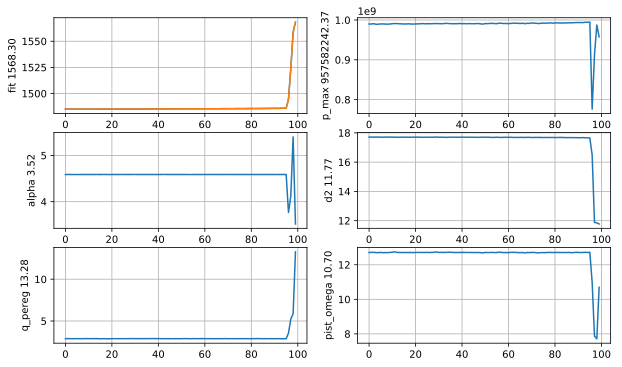

In [166]:
all_data = []
for fn in glob.glob('*.csv'):
    with open(fn) as f:
        reader = csv.DictReader(f)
        for l in reader:
            all_data.append(l)
def get_some(name):
    top_gener = [d for d in all_data if d['Cq'] == '2.0']
    l = seq(top_gener) \
        .sorted(lambda d: float(d['fit'])) \
        .map(lambda d: float(d[name])) \
        .to_list()[-100:]
    plt.plot(l)
    plt.ylabel(f'{name} {l[-1]:.2f}')
    plt.grid(True)
    
plt.subplot(321)
get_some('V_max')
get_some('fit')

plt.subplot(322)
get_some('p_max')
plt.subplot(323)
get_some('alpha')
plt.subplot(324)
get_some('d2')
plt.subplot(325)
get_some('q_pereg')
plt.subplot(326)
get_some('pist_omega')

plt.show()


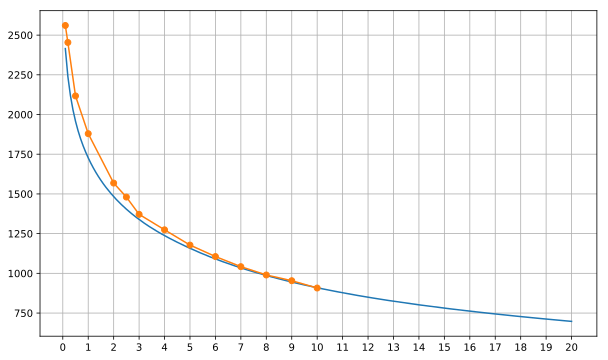

In [167]:
cqs_vds = np.load('He_simple_p100.npy')
grouped = seq(all_data).group_by(lambda d: d['Cq']).to_list()
cqs = seq(grouped).map(lambda tp: (tp[0], seq(tp[1]).max_by(lambda od: float(od['fit']))['V_max']))\
    .map(lambda tp: (float(tp[0]), float(tp[1]))).filter(lambda tp: tp[0] < 11).sorted(lambda tp: tp[0]).to_list()
cqs = np.array(cqs).T
plt.plot(cqs_vds[0], cqs_vds[1], '-')
plt.plot(cqs[0], cqs[1], 'o-')
plt.grid()
plt.xticks(np.linspace(0,20,21))
plt.show()

In [5]:
import sqlite3\

In [12]:
from sqlitedict import SqliteDict
mydict = SqliteDict('dbTest.sqlite', autocommit=True)


In [13]:
mydict['some_key']

OrderedDict([('p_0', '55000000.0'),
             ('alpha', '16.5'),
             ('d2', '12.5'),
             ('q_pereg', '25.5'),
             ('pist_omega', '85.0'),
             ('Cq', '1.0'),
             ('V_max', '583.0862663178586'),
             ('p_max', '436668396.6828259'),
             ('shtraf', '0'),
             ('fit', '583.0862663178586')])

In [14]:
mydict2 = SqliteDict('dbTest.sqlite', autocommit=True)

OrderedDict([('p_0', '55000000.0'),
             ('alpha', '16.5'),
             ('d2', '12.5'),
             ('q_pereg', '25.5'),
             ('pist_omega', '85.0'),
             ('Cq', '1.0'),
             ('V_max', '583.0862663178586'),
             ('p_max', '436668396.6828259'),
             ('shtraf', '0'),
             ('fit', '583.0862663178586')])

In [20]:
for key, value in mydict.iteritems():
    print(key, value)
print(len(mydict)) # etc... all dict functions work
mydict.close()

some_key OrderedDict([('p_0', '55000000.0'), ('alpha', '16.5'), ('d2', '12.5'), ('q_pereg', '25.5'), ('pist_omega', '85.0'), ('Cq', '1.0'), ('V_max', '583.0862663178586'), ('p_max', '436668396.6828259'), ('shtraf', '0'), ('fit', '583.0862663178586')])
1


In [22]:
# Коныертируем все данные в db
all_data = []
for fn in glob.glob('*.csv'):
    with open(fn) as f:
        reader = csv.DictReader(f)
        for d in reader:
            d = {k: float(d[k]) for k in d}
            all_data.append(d)

In [23]:
all_data[0]

{'p_0': 55000000.0,
 'alpha': 16.5,
 'd2': 12.5,
 'q_pereg': 25.5,
 'pist_omega': 85.0,
 'Cq': 1.0,
 'V_max': 583.0862663178586,
 'p_max': 436668396.6828259,
 'shtraf': 0.0,
 'fit': 583.0862663178586}